#### K Means Clustering- Travel Review Ratings dataset

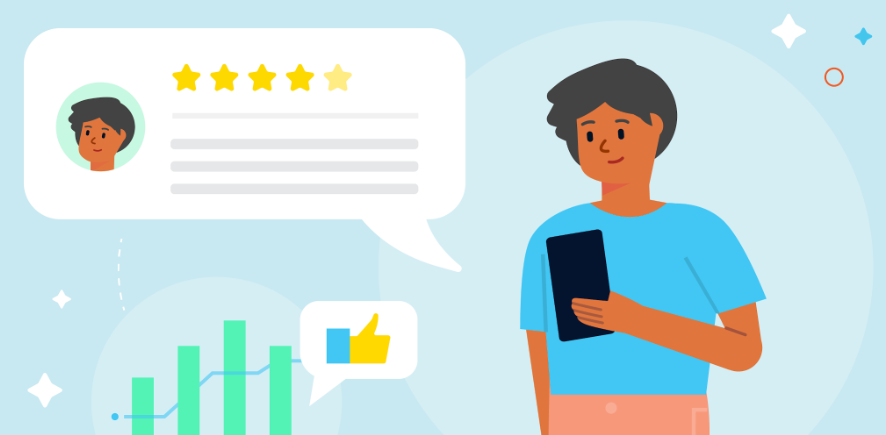

#### Unsupervised Machine Learning
- It is the training of a machine using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance. 
- Machine has to group unlabelled, unsorted information according to similarities, patterns, and differences without any prior training of data.

#### Clustering
- Clustering or cluster analysis is a unsupervised machine learning technique, which groups the unlabelled dataset. 
- It is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. 

#### Centroid
- A centroid is the location representing the center of the cluster.

#### K-means clustering algorithm 
- It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.
- The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. 

#### K-means clustering algorithm's tasks-
- To determine the best value for K center points or centroids by an iterative process.
- Then assign each data point to its closest k-center. 
- The data points which are near to the particular k-center, create a cluster of datapoints which have some commonalities, and are far from other clusters.

#### Objective
- The objective is to analyse and cluster the data based on the reviews rating.

#### Dataset source & brief
- The dataset has been sourced from Kaggle and is populated by capturing user ratings from Google reviews. Google user rating ranges from 1 to 5 and average user rating per category is calculated.It contains reviews on attractions from 24 categories - Churches, Resorts, Beaches, Parks, Theatres, Museums, Malls, Zoo, Restaurants, Bars, Local Services, Fast Food, Lodgings, Juice Bars, Art Galleries, Dance Clubs, Swimming Pools, Gyms, Bakeries, Spas, Cafes, View Points, Monuments and Gardens.

#### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load and read the dataset

In [2]:
df=pd.read_csv(r"C:\Users\manme\Documents\Priya\Stats and ML\Dataset\ReviewRatings.csv")
df.head()

,User,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,...,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


#### Basic information

In [3]:
df.shape  # check shape

(5456, 25)

In [4]:
df.duplicated().sum()  #check duplicates

0

In [5]:
df.isnull().sum() #check null values

User              0
Churches          0
Resorts           0
Beaches           0
Parks             0
Theatres          0
Museums           0
Malls             0
Zoo               0
Restaurants       0
Bars              0
Local Services    0
Fast Food         0
Lodgings          0
Juice Bars        0
Art Galleries     0
Dance Clubs       0
Swimming Pools    0
Gyms              0
Bakeries          0
Spas              0
Cafes             0
View Points       0
Monuments         0
Gardens           0
dtype: int64

In [6]:
df.info()  # check info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User            5456 non-null   object 
 1   Churches        5456 non-null   float64
 2   Resorts         5456 non-null   float64
 3   Beaches         5456 non-null   float64
 4   Parks           5456 non-null   float64
 5   Theatres        5456 non-null   float64
 6   Museums         5456 non-null   float64
 7   Malls           5456 non-null   float64
 8   Zoo             5456 non-null   float64
 9   Restaurants     5456 non-null   float64
 10  Bars            5456 non-null   float64
 11  Local Services  5456 non-null   float64
 12  Fast Food       5456 non-null   float64
 13  Lodgings        5456 non-null   float64
 14  Juice Bars      5456 non-null   float64
 15  Art Galleries   5456 non-null   float64
 16  Dance Clubs     5456 non-null   float64
 17  Swimming Pools  5456 non-null   f

In [7]:
df.describe().T   #statistical summary

,count,mean,std,min,25%,50%,75%,max
Churches,5456.0,1.455720,0.827604,0.00,0.92,1.340,1.8100,5.0
Resorts,5456.0,2.319707,1.421438,0.00,1.36,1.905,2.6825,5.0
Beaches,5456.0,2.489331,1.247815,0.00,1.54,2.060,2.7400,5.0
Parks,5456.0,2.796886,1.309159,0.83,1.73,2.460,4.0925,5.0
Theatres,5456.0,2.958941,1.339056,1.12,1.77,2.670,4.3125,5.0
Museums,5456.0,2.893490,1.282400,1.11,1.79,2.680,3.8400,5.0
Malls,5456.0,3.351395,1.413492,1.12,1.93,3.230,5.0000,5.0
Zoo,5456.0,2.540795,1.111391,0.86,1.62,2.170,3.1900,5.0
Restaurants,5456.0,3.126019,1.356802,0.84,1.80,2.800,5.0000,5.0
Bars,5456.0,2.832729,1.307665,0.81,1.64,2.680,3.5300,5.0


In [8]:
for i in df.columns:      
    print("----------------------", i ,
         "-----------------------")
    print()
    print(set(df[i].tolist()))
    print()

---------------------- User -----------------------

{'User 1553', 'User 1336', 'User 3167', 'User 4971', 'User 2515', 'User 865', 'User 4329', 'User 1975', 'User 1985', 'User 4821', 'User 5290', 'User 2706', 'User 4666', 'User 3493', 'User 4928', 'User 4143', 'User 1519', 'User 866', 'User 1661', 'User 4342', 'User 4699', 'User 5283', 'User 464', 'User 3872', 'User 1032', 'User 1847', 'User 5416', 'User 568', 'User 565', 'User 899', 'User 1840', 'User 5134', 'User 135', 'User 3659', 'User 1943', 'User 2435', 'User 5265', 'User 4604', 'User 2433', 'User 590', 'User 4812', 'User 5082', 'User 5448', 'User 3065', 'User 2855', 'User 1503', 'User 2640', 'User 696', 'User 1073', 'User 1796', 'User 1513', 'User 4951', 'User 4707', 'User 524', 'User 2453', 'User 147', 'User 223', 'User 2805', 'User 1092', 'User 227', 'User 3783', 'User 940', 'User 2098', 'User 1383', 'User 2165', 'User 4674', 'User 4635', 'User 4854', 'User 688', 'User 88', 'User 1121', 'User 830', 'User 4325', 'User 4715', 'U

#### Exploratory Data Analysis

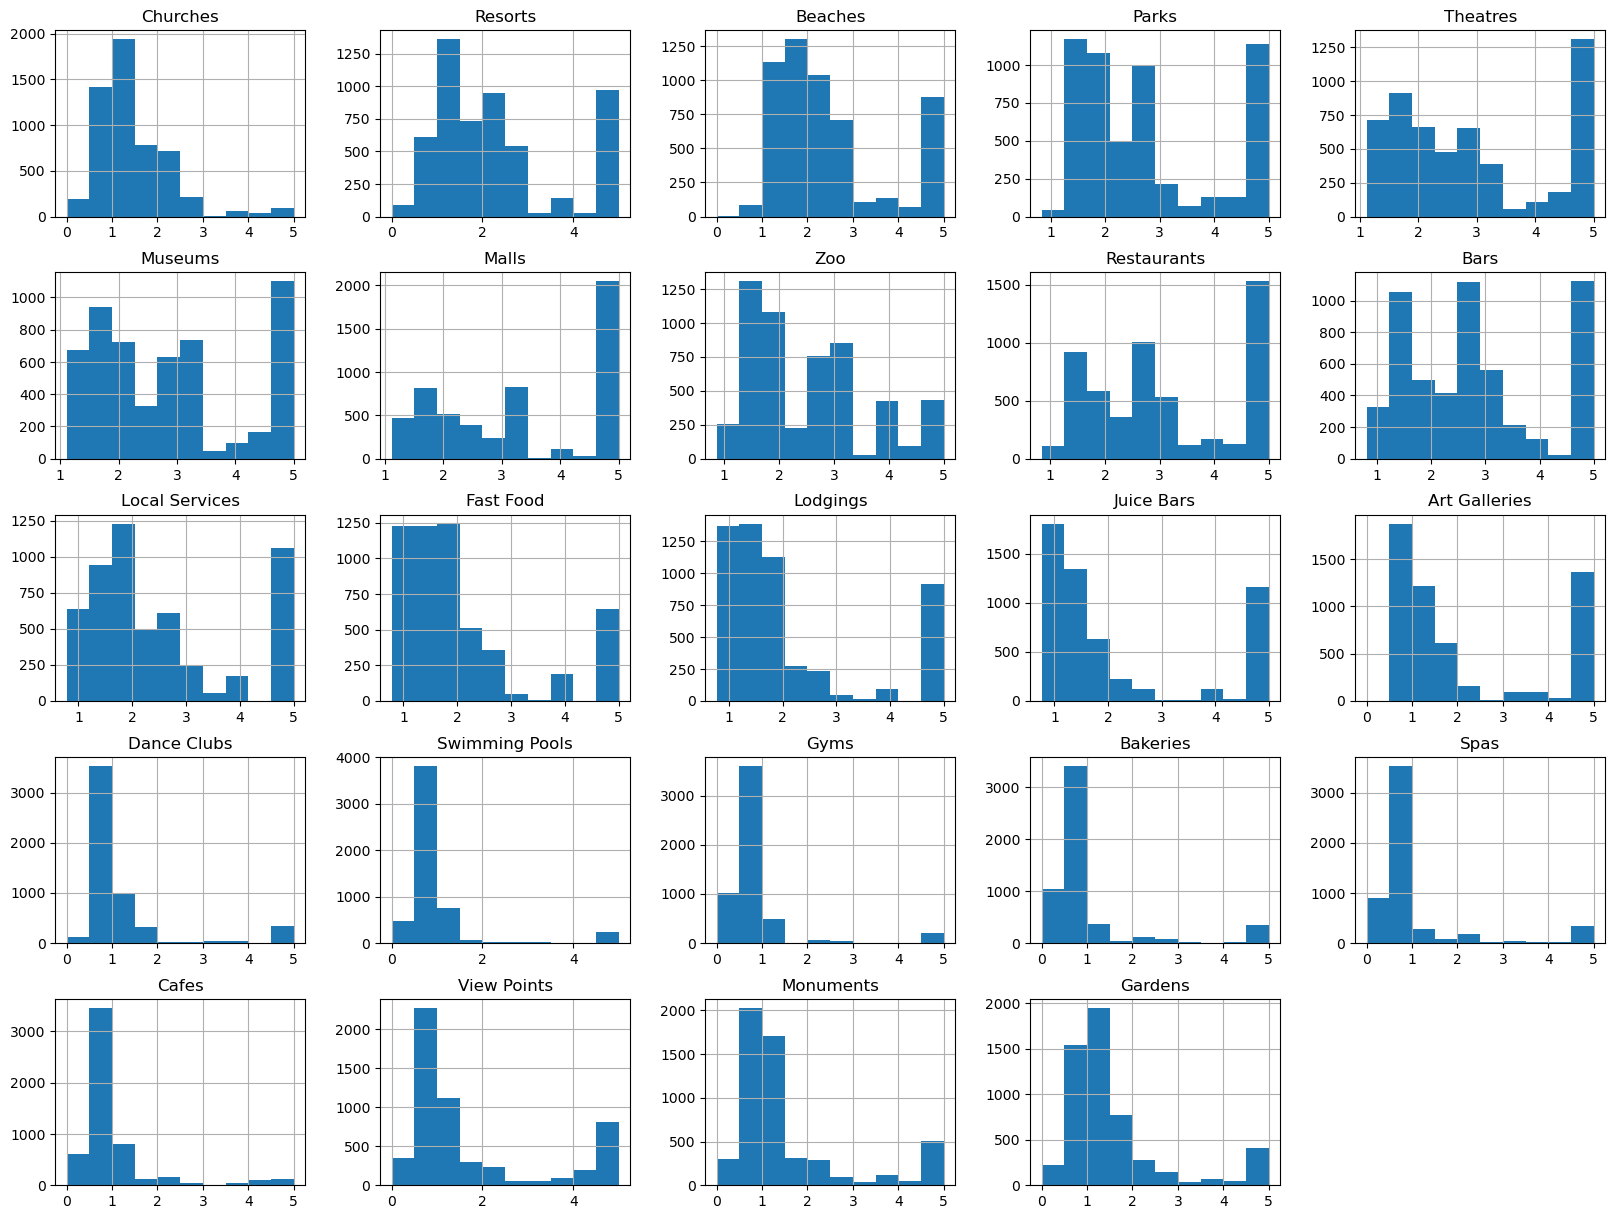

In [9]:
df.hist(figsize=(20,15))
plt.show()

In [10]:
df.columns

Index(['User', 'Churches', 'Resorts', 'Beaches', 'Parks', 'Theatres',
       'Museums', 'Malls', 'Zoo', 'Restaurants', 'Bars', 'Local Services',
       'Fast Food', 'Lodgings', 'Juice Bars', 'Art Galleries', 'Dance Clubs',
       'Swimming Pools', 'Gyms', 'Bakeries', 'Spas', 'Cafes', 'View Points',
       'Monuments', 'Gardens'],
      dtype='object')

In [11]:
cols= ['User','Churches', 'Resorts', 'Beaches', 'Parks', 'Theatres', 'Museums','Malls', 'Zoo', 'Restaurants',
       'Bars', 'Local Services', 'Fast Food','Lodgings', 'Juice Bars', 'Art Galleries', 'Dance Clubs',
       'Swimming Pools', 'Gyms', 'Bakeries', 'Spas', 'Cafes', 'View Points','Monuments', 'Gardens']
df.columns= cols

In [12]:
reviews = df[cols[1:]].astype(bool).sum(axis=0).sort_values()

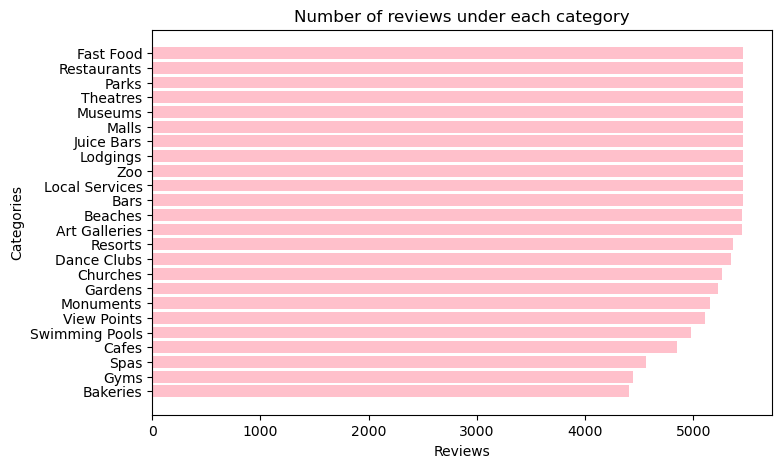

In [13]:
plt.figure(figsize=(8,5))
plt.barh(np.arange(len(cols[1:])), reviews.values, color='pink')
plt.yticks(np.arange(len(cols[1:])), reviews.index)
plt.xlabel('Reviews')
plt.ylabel('Categories')
plt.title('Number of reviews under each category')
plt.show()

In [14]:
avg_rating = df[cols[1:]].mean()
avg_rating = avg_rating.sort_values()

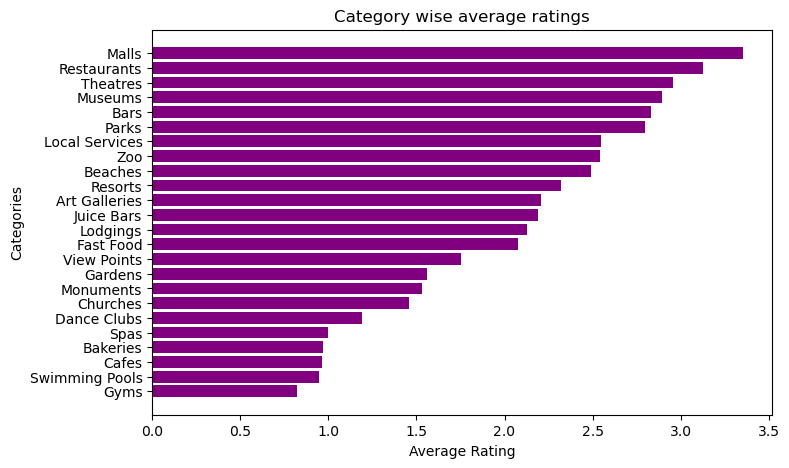

In [15]:
plt.figure(figsize=(8,5))
plt.barh(np.arange(len(cols[1:])), avg_rating.values, color='purple')
plt.yticks(np.arange(len(cols[1:])), avg_rating.index)
plt.xlabel('Average Rating')
plt.ylabel('Categories')
plt.title('Category wise average ratings')
plt.show()

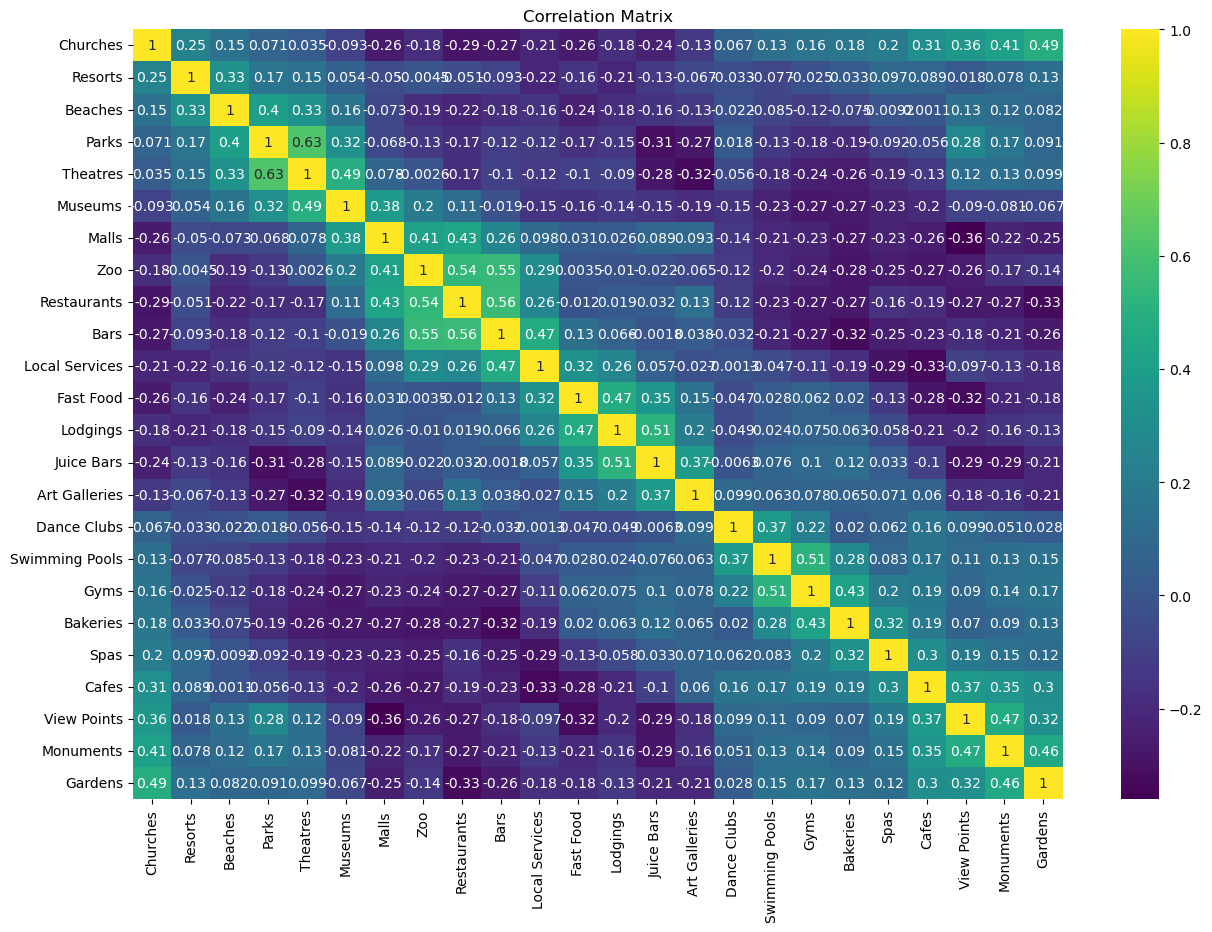

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [17]:
df.drop(['User'],axis=1,inplace=True) # Drop non significant variable

In [18]:
# Define x
x=df.iloc[:,:].values
x

array([[0.  , 0.  , 3.63, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 3.63, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 3.63, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.94, 5.  , 4.03, ..., 5.  , 5.  , 1.11],
       [0.95, 4.05, 4.05, ..., 5.  , 5.  , 1.12],
       [0.95, 4.07, 5.  , ..., 5.  , 5.  , 1.17]])

#### Feature Scaling
- Feature scaling matters in K-Means clustering algorithm because it uses the Euclidean distance measure.

In [19]:
from sklearn.preprocessing import StandardScaler
x_scaled=StandardScaler()
x_scaled=x_scaled.fit_transform(x)
x_scaled

array([[-1.75911777, -1.6320937 ,  0.91421654, ..., -1.09505221,
        -1.16303953, -1.33211789],
       [-1.75911777, -1.6320937 ,  0.91421654, ..., -1.09505221,
        -1.16303953, -1.33211789],
       [-1.75911777, -1.6320937 ,  0.91421654, ..., -1.09505221,
        -1.16303953, -1.33211789],
       ...,
       [-0.6232054 ,  1.88579429,  1.23480615, ...,  2.03270857,
         2.63413607, -0.38466551],
       [-0.61112123,  1.21739557,  1.25083563, ...,  2.03270857,
         2.63413607, -0.37612991],
       [-0.61112123,  1.23146712,  2.01223593, ...,  2.03270857,
         2.63413607, -0.33345187]])

#### K Means Cluster creation

In [20]:
from sklearn.cluster import KMeans

#### Elbow Method
- The Elbow method is a technique that we use to determine the number of centroids(k) to use in a k-means clustering algorithm.  - In this method to determine the k-value, it continuously iterate for k=1 to k=n and within-cluster sum of squares (WCSS) value is calculated for every value of k.

#### WCSS (Within-cluster sum of squares) 
- It is defined as the sum of square distances between the centroids and each points.

#### Finding number of clusters through Elbow method

In [21]:
wcss=[]

for i in range(1,10):
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(x_scaled)
    wcss.append(km.inertia_)

In [22]:
wcss

[130943.99999999996,
 112267.39268999005,
 99754.74546400149,
 92075.25244554106,
 87491.68971591254,
 83109.75509404547,
 79758.96039075515,
 76794.45149986423,
 74517.99915355991]

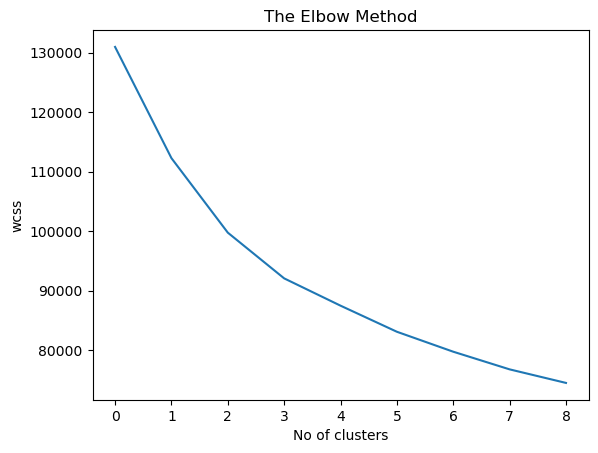

In [23]:
plt.plot(wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

- Basis the Elbow method no of clusters is equal to 3

In [24]:
Kmeans=KMeans(n_clusters=3,random_state=1)
Kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=1)

In [25]:
labels=Kmeans.labels_
labels

array([2, 2, 2, ..., 0, 0, 0])

#### Silhouette score
- The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster compared to other clusters. Its value ranges from -1 to 1.
    - a. 1 means clusters are clearly distinguished.
    - b. 0 means that the distance between clusters is not significant.
    - c. -1 means clusters are assigned in the wrong way.

#### Evaluation for all 3 clusters by the Silhouette score

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(x_scaled,labels,random_state=1)

0.1454667129792058

#### Adding Cluster variable to the dataset

In [27]:
df['Cluster_column']=labels
df.head()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Bars,...,Dance Clubs,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens,Cluster_column
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2
